### Cluster Analysis - Customer Segmentation

In this project, I have used hierarchial clustering and k-means clustering for customer segementation over the
    wholesale distributor dataset

##### Loading the data

In [6]:
customer <- read.csv("Desktop/Wholesale customers data.csv")

##### Data Exploration

In [7]:
# prints the top records in customer table
head(customer)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [8]:
str(customer)

'data.frame':	440 obs. of  8 variables:
 $ Channel         : int  2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


1) removing the null values

2) dropping the columns "Channel" and "Region" as they are not helpful for clustering

In [9]:
customer1<- customer
customer1<- na.omit(customer1)
customer1$Channel <- NULL
customer1$Region <- NULL

###### Variable Standardization

In [10]:
customer1 <- scale(customer1)

In [11]:
head(customer1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,0.05287300,0.52297247,-0.04106815,-0.5886970,-0.04351919,-0.06626363
2,-0.39085706,0.54383861,0.17012470,-0.2698290,0.08630859,0.08904969
3,-0.44652098,0.40807319,-0.02812509,-0.1373793,0.13308016,2.24074190
4,0.09999758,-0.62331041,-0.39253008,0.6863630,-0.49802132,0.09330484
5,0.83928412,-0.05233688,-0.07926595,0.1736612,-0.23165413,1.29786952
6,-0.20457266,0.33368675,-0.29729863,-0.4955909,-0.22787885,-0.02619421


#### K - Means Clustering
    Determining the number of clusters

In [12]:
wss <- (nrow(customer1)-1)*sum(apply(customer1,2,var))


In [13]:
wss

[1] 2634

In [14]:
for (i in 2:15) wss[i] <- sum(kmeans(customer1, 
  	centers=i)$withinss)


In [15]:
wss

[1] 2634.0000 1949.6006 1610.3268 1353.8722 1083.0248  987.5077  829.9178
 [8]  793.5424  689.0632  597.5906  622.1236  526.6000  482.9162  479.5479
[15]  457.3933

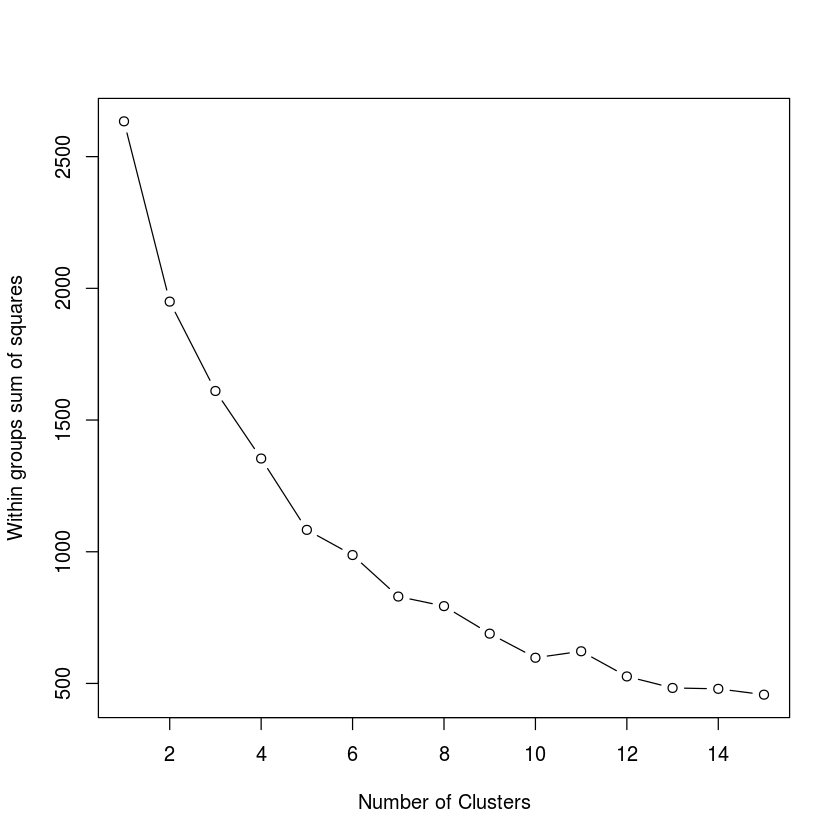

In [16]:
plot(1:15, wss, type="b", xlab="Number of Clusters",
  ylab="Within groups sum of squares")

#### Fitting the Model

In [17]:
fit <- kmeans(customer1, 6) # fit the model


In [18]:
fit

K-means clustering with 6 clusters of sizes 41, 98, 6, 28, 35, 232

Cluster means:
       Fresh       Milk    Grocery     Frozen Detergents_Paper  Delicassen
1  2.2141700 -0.1367268 -0.1611873  0.3238308       -0.3593641  0.41697371
2 -0.4883343  0.4118988  0.5025661 -0.3100491        0.4748524  0.01870206
3  1.4583872  5.8244179  4.1134434  1.2464076        3.4626351  3.99782720
4 -0.4956533  1.3928080  2.1235120 -0.2905307        2.3920702  0.19597323
5  0.3575359 -0.2009665 -0.3827168  2.0520397       -0.4967209  0.03341854
6 -0.2168534 -0.4382396 -0.4887358 -0.2330053       -0.4403886 -0.21367494

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   6   1   6   6   2   6   2   2   6   1   2   2   6   2   6   2   6 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  6   6   1   3   2   6   6   6   4   1   6   6   6   1   6   2   1   2   2   1 
 41  42  43  44  45  46  47  48  49  50  51  52 

In [19]:
aggregate(customer1,by=list(fit$cluster),FUN=mean) # get cluster means


Group.1,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,2.2141700,-0.1367268,-0.1611873,0.3238308,-0.3593641,0.41697371
2,-0.4883343,0.4118988,0.5025661,-0.3100491,0.4748524,0.01870206
3,1.4583872,5.8244179,4.1134434,1.2464076,3.4626351,3.99782720
4,-0.4956533,1.3928080,2.1235120,-0.2905307,2.3920702,0.19597323
5,0.3575359,-0.2009665,-0.3827168,2.0520397,-0.4967209,0.03341854
6,-0.2168534,-0.4382396,-0.4887358,-0.2330053,-0.4403886,-0.21367494


In [20]:
customer1 <- data.frame(customer1, fit$cluster) #append cluster assignment

#### Results plots using clusplot function

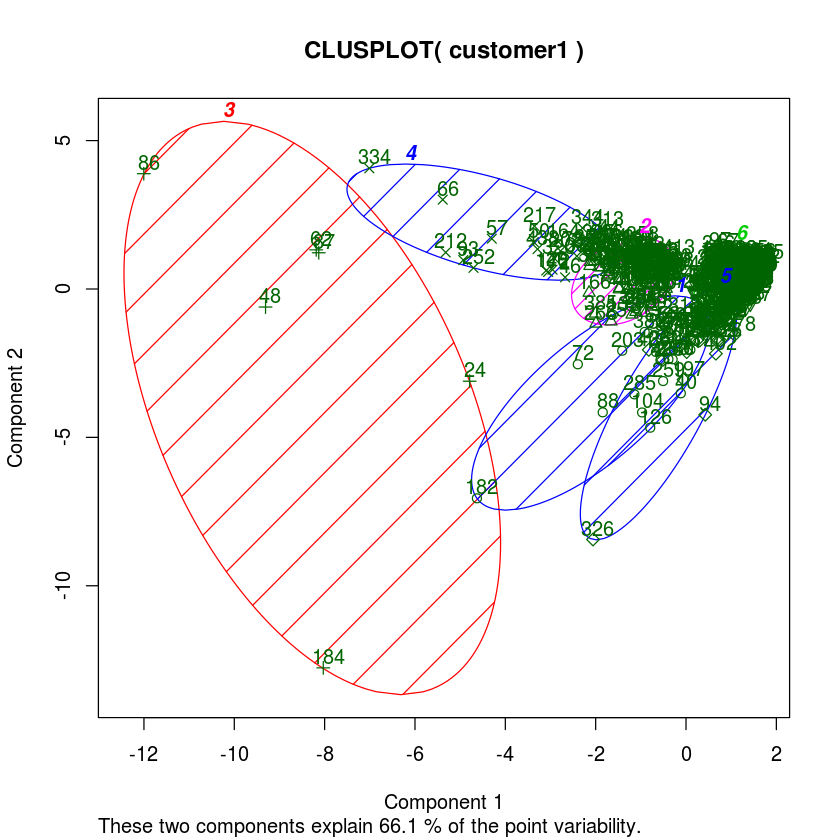

In [21]:
library(cluster)
clusplot(customer1, fit$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

#### K-means helping to find outlier detection

In [23]:
# data are partitioned into k groups by assigning them to the closest cluster centers
customer2 <- customer[, 3:8]
kmeans.result <- kmeans(customer2, centers=6)
kmeans.result$centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,33290.133,4951.200,5621.067,4209.511,955.4889,1931.000
2,61903.375,13358.375,10448.375,21728.750,1301.2500,9270.125
3,20031.286,38084.000,56126.143,2564.571,27644.5714,2548.143
4,16177.138,3123.224,4480.181,3620.595,1093.0690,1402.250
5,5125.548,12509.986,19326.548,1610.630,8443.1233,1893.945
6,4690.660,3552.749,4390.602,2266.361,1454.4188,1000.686


In [24]:
kmeans.result

K-means clustering with 6 clusters of sizes 45, 8, 7, 116, 73, 191

Cluster means:
      Fresh      Milk   Grocery    Frozen Detergents_Paper Delicassen
1 33290.133  4951.200  5621.067  4209.511         955.4889   1931.000
2 61903.375 13358.375 10448.375 21728.750        1301.2500   9270.125
3 20031.286 38084.000 56126.143  2564.571       27644.5714   2548.143
4 16177.138  3123.224  4480.181  3620.595        1093.0690   1402.250
5  5125.548 12509.986 19326.548  1610.630        8443.1233   1893.945
6  4690.660  3552.749  4390.602  2266.361        1454.4188   1000.686

Clustering vector:
  [1] 4 6 6 4 4 6 4 6 6 5 6 4 1 4 1 6 5 6 4 6 4 6 1 5 4 4 6 4 5 1 4 6 4 1 6 6 1
 [38] 4 5 2 4 4 5 5 6 5 5 3 4 5 6 6 1 5 1 6 5 5 4 6 6 3 6 5 6 3 6 4 6 6 4 4 6 4
 [75] 6 4 6 5 4 6 6 5 6 4 4 3 3 1 6 1 4 4 5 4 5 6 6 6 6 6 5 5 6 2 4 4 6 5 6 5 4
[112] 5 4 4 4 4 4 6 4 6 4 6 4 4 1 2 4 4 6 1 6 6 4 6 6 6 6 6 4 6 4 1 1 4 4 5 6 6
[149] 6 1 4 6 4 6 6 5 5 4 6 5 6 4 4 5 6 5 6 6 6 6 5 5 6 5 6 6 1 4 4 6 4 2 6 2 6
[186] 6

In [25]:
kmeans.result$cluster  # print out cluster IDs 
kmeans.result$centers


[1] 4 6 6 4 4 6 4 6 6 5 6 4 1 4 1 6 5 6 4 6 4 6 1 5 4 4 6 4 5 1 4 6 4 1 6 6 1
 [38] 4 5 2 4 4 5 5 6 5 5 3 4 5 6 6 1 5 1 6 5 5 4 6 6 3 6 5 6 3 6 4 6 6 4 4 6 4
 [75] 6 4 6 5 4 6 6 5 6 4 4 3 3 1 6 1 4 4 5 4 5 6 6 6 6 6 5 5 6 2 4 4 6 5 6 5 4
[112] 5 4 4 4 4 4 6 4 6 4 6 4 4 1 2 4 4 6 1 6 6 4 6 6 6 6 6 4 6 4 1 1 4 4 5 6 6
[149] 6 1 4 6 4 6 6 5 5 4 6 5 6 4 4 5 6 5 6 6 6 6 5 5 6 5 6 6 1 4 4 6 4 2 6 2 6
[186] 6 6 6 5 5 4 4 6 5 6 4 1 6 4 6 5 5 1 6 6 5 6 6 6 5 4 3 6 6 6 5 5 4 5 6 4 6
[223] 6 6 6 4 4 6 6 6 4 6 1 6 4 6 6 4 6 1 4 4 4 4 6 5 6 4 4 6 6 5 6 1 6 1 4 6 2
[260] 1 6 6 4 6 5 5 5 4 5 4 6 6 6 1 6 6 1 4 4 4 6 4 1 1 2 1 6 4 4 1 6 6 6 5 4 6
[297] 4 6 6 6 4 5 6 5 5 6 5 4 6 5 6 1 5 6 4 5 6 6 4 5 6 6 4 4 1 2 6 6 4 6 6 5 4
[334] 3 4 1 4 6 6 6 6 6 6 5 6 6 5 1 6 5 6 5 6 5 4 6 4 5 6 6 4 6 6 6 6 6 6 6 4 6
[371] 1 4 6 4 6 6 5 1 6 6 1 4 1 6 5 4 6 4 6 6 6 6 6 4 4 6 6 4 4 6 6 1 1 1 4 6 1
[408] 5 6 6 6 6 6 6 6 6 5 6 5 6 5 4 1 4 4 4 5 1 6 6 5 6 4 6 4 1 1 5 6 6

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,33290.133,4951.200,5621.067,4209.511,955.4889,1931.000
2,61903.375,13358.375,10448.375,21728.750,1301.2500,9270.125
3,20031.286,38084.000,56126.143,2564.571,27644.5714,2548.143
4,16177.138,3123.224,4480.181,3620.595,1093.0690,1402.250
5,5125.548,12509.986,19326.548,1610.630,8443.1233,1893.945
6,4690.660,3552.749,4390.602,2266.361,1454.4188,1000.686


In [26]:
# calculate the distance between each object and its cluster center, and pick those with largest distances as outliers.
centers <- kmeans.result$centers[kmeans.result$cluster, ]
centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
4,16177.138,3123.224,4480.181,3620.595,1093.0690,1402.250
6,4690.660,3552.749,4390.602,2266.361,1454.4188,1000.686
6,4690.660,3552.749,4390.602,2266.361,1454.4188,1000.686
4,16177.138,3123.224,4480.181,3620.595,1093.0690,1402.250
4,16177.138,3123.224,4480.181,3620.595,1093.0690,1402.250
6,4690.660,3552.749,4390.602,2266.361,1454.4188,1000.686
4,16177.138,3123.224,4480.181,3620.595,1093.0690,1402.250
6,4690.660,3552.749,4390.602,2266.361,1454.4188,1000.686
6,4690.660,3552.749,4390.602,2266.361,1454.4188,1000.686
5,5125.548,12509.986,19326.548,1610.630,8443.1233,1893.945


In [27]:
customer2[4,]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
4,13265,1196,4221,6404,507,1788


In [28]:
distances <- sqrt(rowSums((customer2 - centers)^2)) # calculate distances


In [29]:
outliers <- order(distances, decreasing=T)[1:5] # pick up top 5 distances
print(customer2[outliers,])

     Fresh  Milk Grocery Frozen Detergents_Paper Delicassen
184  36847 43950   20170  36534              239      47943
182 112151 29627   18148  16745             4948       8550
326  32717 16784   13626  60869             1272       5609
87   22925 73498   32114    987            20070        903
86   16117 46197   92780   1026            40827       2944


1) 40 samples are considered for this clustering to avoid overcrowding
2) "Channel" and "Region" are dropped

In [30]:
idx <- sample(1:dim(customer)[1], 40)
customerSample <- customer[idx,]
customerSample$Region <- NULL
customerSample$Channel <- NULL

##### Implmented Wards approach for hierarchial clustering

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


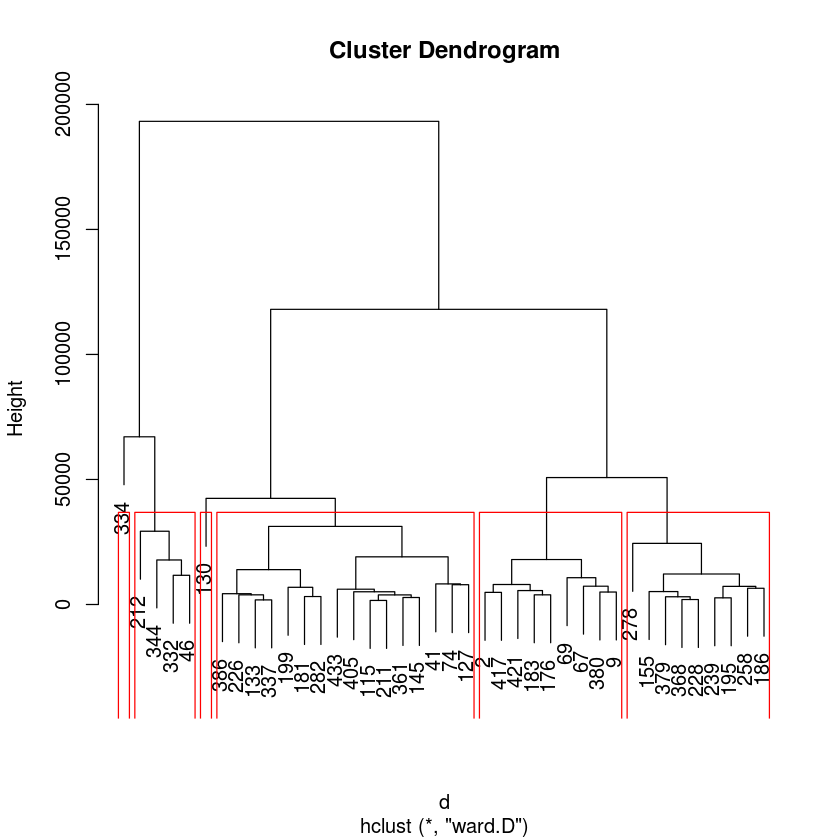

In [33]:
d <- dist(customerSample, method = "euclidean") # distance matrix
fit <- hclust(d, method="ward") 
plot(fit) # display dendogram
groups <- cutree(fit, k=6) # cut tree into 6 clusters
# draw dendogram with red borders around the 6 clusters 
rect.hclust(fit, k=6, border="red")


In [32]:
groups <- cutree(fit, k=6) # cut tree into 6 clusters
# draw dendogram with red borders around the 6 clusters 
rect.hclust(fit, k=6, border="red")

ERROR: Error in rect(m[which[n]] + 0.66, par("usr")[3L], m[which[n] + 1] + 0.33, : plot.new has not been called yet


#### Interpretation

Each of the 40 data samples are assigned to separate clusters, 

Two closest clusters are then merged till there is just one cluster at the top. 

The height in the dendrogram at which two clusters are merged represents the distance between
two clusters in the data space. 

The decision of the number of clusters that can best depict different groups can be chosen by 
observing the dendrogram.